In [44]:
# Import the random module.
import random
# Import timeit.
import timeit
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key


In [45]:
#######output file (CSV)
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)
#list for holding lat/lng
lat_lngs = []
cities = []

In [24]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [25]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
# Print the city count to confirm sufficient count
print("{} cities have been identified to poll for weather".format(len(cities)))


602 cities have been identified to poll for weather


In [30]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [32]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 1 | gamba
Processing Record 5 of Set 1 | lamu
Processing Record 6 of Set 1 | namatanai
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | ostrovnoy
Processing Record 11 of Set 1 | richards bay
Processing Record 12 of Set 1 | bhanvad
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | margate
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | ushuaia

Processing Record 38 of Set 4 | ahipara
Processing Record 39 of Set 4 | kodinsk
Processing Record 40 of Set 4 | catacamas
Processing Record 41 of Set 4 | tchibanga
Processing Record 42 of Set 4 | zyryanka
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | coutances
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | clyde river
Processing Record 48 of Set 4 | seltso
Processing Record 49 of Set 4 | ust-kuyga
Processing Record 50 of Set 4 | gibraleon
Processing Record 1 of Set 5 | borujan
City not found. Skipping...
Processing Record 2 of Set 5 | pochutla
Processing Record 3 of Set 5 | deer lake
Processing Record 4 of Set 5 | san jeronimo
Processing Record 5 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 6 of Set 5 | dong hoi
Processing Record 7 of Set 5 | belen
Processing Record 8 of Set 5 | sosnogorsk
Processing Record 9 of Set 5 | katsuura
Processing Record 10 of Set 5 | saleaul

KeyboardInterrupt: 

In [58]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-44.52,100,62,4.68,RU,2021-12-03 00:16:06
1,Carnarvon,-24.8667,113.6333,73.47,68,90,23.02,AU,2021-12-03 00:16:07
2,Gamba,-2.6500,10.0000,77.29,86,100,3.00,GA,2021-12-03 00:16:07
3,Lamu,-2.2717,40.9020,80.82,81,21,7.54,KE,2021-12-03 00:14:26
4,Namatanai,-3.6667,152.4333,84.33,71,93,4.88,PG,2021-12-03 00:16:08
...,...,...,...,...,...,...,...,...,...
222,Lasa,46.6166,10.7002,29.14,94,99,6.78,IT,2021-12-03 00:21:15
223,Tambura,5.6000,27.4667,73.94,66,100,0.29,SS,2021-12-03 00:21:15
224,Mount Gambier,-37.8333,140.7667,63.99,41,37,6.69,AU,2021-12-03 00:21:15
225,Garowe,8.4054,48.4845,66.38,75,2,7.61,SO,2021-12-03 00:21:16


In [59]:
#change column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-12-03 00:16:06,71.9167,114.0833,-44.52,100,62,4.68
1,Carnarvon,AU,2021-12-03 00:16:07,-24.8667,113.6333,73.47,68,90,23.02
2,Gamba,GA,2021-12-03 00:16:07,-2.6500,10.0000,77.29,86,100,3.00
3,Lamu,KE,2021-12-03 00:14:26,-2.2717,40.9020,80.82,81,21,7.54
4,Namatanai,PG,2021-12-03 00:16:08,-3.6667,152.4333,84.33,71,93,4.88
...,...,...,...,...,...,...,...,...,...
222,Lasa,IT,2021-12-03 00:21:15,46.6166,10.7002,29.14,94,99,6.78
223,Tambura,SS,2021-12-03 00:21:15,5.6000,27.4667,73.94,66,100,0.29
224,Mount Gambier,AU,2021-12-03 00:21:15,-37.8333,140.7667,63.99,41,37,6.69
225,Garowe,SO,2021-12-03 00:21:16,8.4054,48.4845,66.38,75,2,7.61


In [60]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [61]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


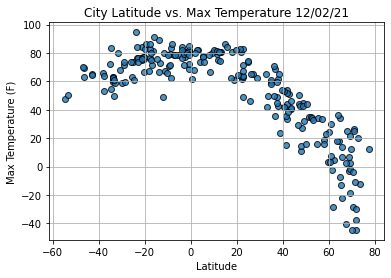

In [62]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

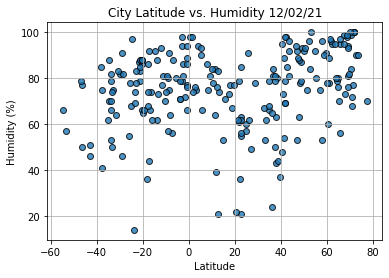

In [63]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

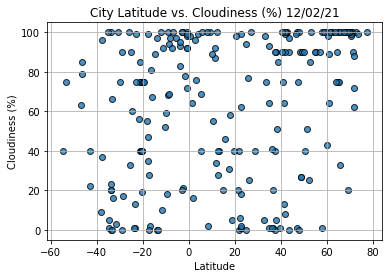

In [64]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

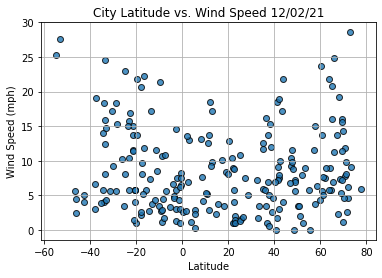

In [65]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [71]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-71-d58af2435033>, line 3)

In [72]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [75]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2021-12-03 00:14:29
Lat                       22.0752
Lng                      -159.319
Max Temp                    80.92
Humidity                       79
Cloudiness                     40
Wind Speed                   1.01
Name: 13, dtype: object

In [77]:
city_data_df["Lat"] >= 0.


0       True
1      False
2      False
3      False
4      False
       ...  
222     True
223     True
224    False
225     True
226    False
Name: Lat, Length: 227, dtype: bool

In [78]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-12-03 00:16:06,71.9167,114.0833,-44.52,100,62,4.68
5,Victoria,HK,2021-12-03 00:11:39,22.2855,114.1577,61.32,36,6,1.01
6,Ostrovnoy,RU,2021-12-03 00:16:08,68.0531,39.5131,25.03,73,100,19.26
8,Bhanvad,IN,2021-12-03 00:16:09,21.9264,69.7736,64.00,61,0,8.93
10,Margate,GB,2021-12-03 00:16:10,51.3813,1.3862,35.04,75,51,1.99
...,...,...,...,...,...,...,...,...,...
219,Kitsuki,JP,2021-12-03 00:21:14,33.4167,131.6167,49.80,62,75,3.44
221,Mogadishu,SO,2021-12-03 00:21:14,2.0371,45.3438,79.77,74,16,13.62
222,Lasa,IT,2021-12-03 00:21:15,46.6166,10.7002,29.14,94,99,6.78
223,Tambura,SS,2021-12-03 00:21:15,5.6000,27.4667,73.94,66,100,0.29


In [79]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-12-03 00:16:06,71.9167,114.0833,-44.52,100,62,4.68
5,Victoria,HK,2021-12-03 00:11:39,22.2855,114.1577,61.32,36,6,1.01
6,Ostrovnoy,RU,2021-12-03 00:16:08,68.0531,39.5131,25.03,73,100,19.26
8,Bhanvad,IN,2021-12-03 00:16:09,21.9264,69.7736,64.00,61,0,8.93
10,Margate,GB,2021-12-03 00:16:10,51.3813,1.3862,35.04,75,51,1.99


In [88]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

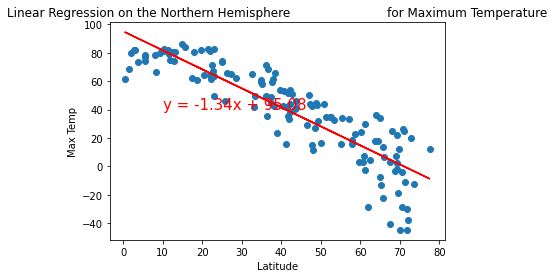

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

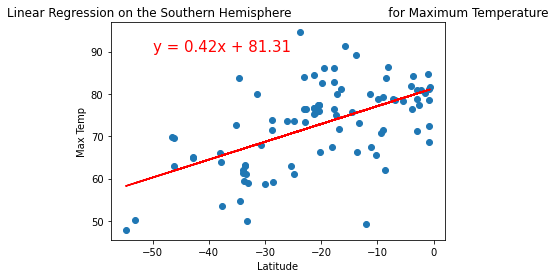

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


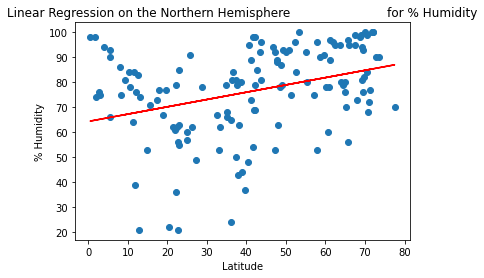

In [93]:
# # Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

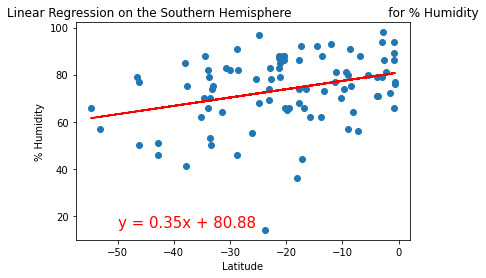

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


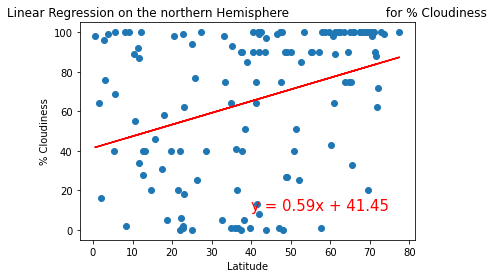

In [99]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

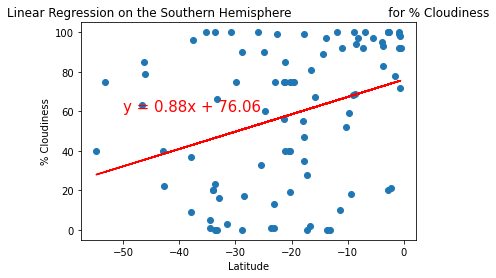

In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

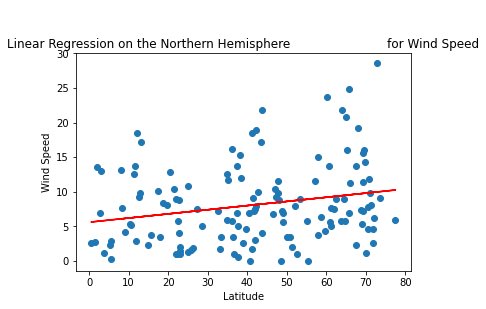

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

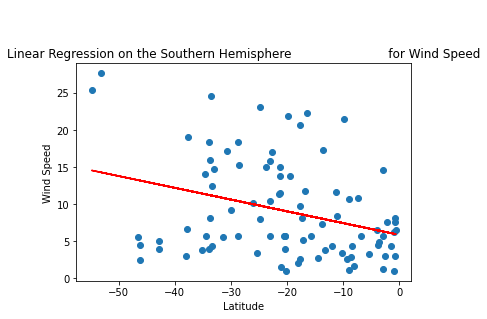

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))